In [43]:
import numpy as np
import pandas as pd
from sklearn import ensemble, model_selection, metrics, datasets, tree
import matplotlib.pyplot as plt

In [87]:
X, y = datasets.load_digits(return_X_y = True)

In [88]:
X.shape[1]**0.5

8.0

In [89]:
dtc = tree.DecisionTreeClassifier()

In [90]:
dtc_scoring = model_selection.cross_val_score(dtc, X, y, cv = 10)
print(dtc_scoring)
print(dtc_scoring.mean())

[0.78378378 0.84699454 0.8121547  0.8        0.76536313 0.87709497
 0.84357542 0.82022472 0.81355932 0.8125    ]
0.81752505761236


In [33]:
bc = ensemble.BaggingClassifier(dtc, n_estimators = 100)

In [34]:
dtc_scoring = model_selection.cross_val_score(bc, X, y, cv = 10)
print(dtc_scoring)
print(dtc_scoring.mean())

[0.87027027 0.95628415 0.90607735 0.94444444 0.91620112 0.98882682
 0.97206704 0.91011236 0.8700565  0.92045455]
0.9254794590033765


In [35]:
bc = ensemble.BaggingClassifier(dtc, max_features = int(X.shape[1]**0.5),  n_estimators = 100)
dtc_scoring = model_selection.cross_val_score(bc, X, y, cv = 10)
dtc_scoring.mean()

0.9298218014660427

In [36]:
dtc = tree.DecisionTreeClassifier(max_features = int(X.shape[1]**0.5))
bc = ensemble.BaggingClassifier(dtc, n_estimators = 100)
dtc_scoring = model_selection.cross_val_score(bc, X, y, cv = 10)
dtc_scoring.mean()

0.9527266062111295

In [74]:
rfc = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 1, max_features = 64)
rfc_scoring = model_selection.cross_val_score(rfc, X, y, cv = 10)
rfc_scoring.mean()

0.4170858244510864

In [53]:
y

[0.9527266062111295,
 0.9527266062111295,
 0.9527266062111295,
 0.9527266062111295,
 0.9527266062111295,
 0.9527266062111295,
 0.9527266062111295,
 0.9527266062111295,
 0.9527266062111295,
 0.9527266062111295]

In [91]:
def p(n, f, d):
    rfc = ensemble.RandomForestClassifier(n_estimators = n, max_depth = d, max_features = f)
    rfc_scoring = model_selection.cross_val_score(rfc, X, y, cv = 10)
    return rfc_scoring.mean()




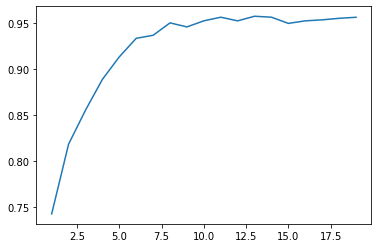

In [92]:
x = np.arange(1, 20, 1)
y = [p(100, 5, z) for z in x]
plt.plot(x,y)

### Модель RandomForestClassifier

#### Кривые обучения для деревьев небольшой глубиной 

In [11]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

In [13]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_low_depth, bioresponce_data, bioresponce_target, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=3, scoring='accuracy')

In [14]:
print(train_sizes)
print(train_scores.mean(axis = 1))
print(test_scores.mean(axis = 1))

[ 250  750 1250 1750 2250]
[0.74933333 0.71333333 0.68453333 0.69104762 0.69022222]
[0.62356685 0.64195598 0.65369955 0.66248974 0.66728527]


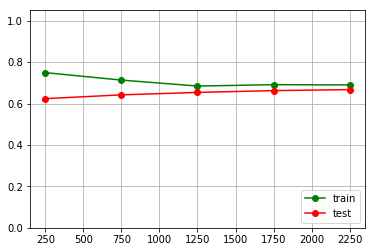

In [15]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

#### Кривые обучения для деревьев большей глубины

In [16]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)

In [19]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, bioresponce_data, bioresponce_target, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')

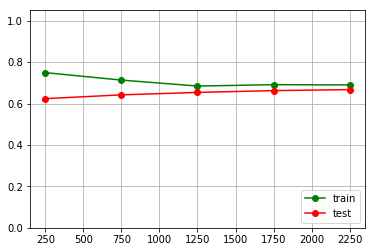

In [18]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')